In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

sns.set()

%matplotlib inline

## PCA

**Метод главных компонент (Principal Component Analysis)** - один из способов уменьшить размерность данных, потеряв минимальное количество информации. Был изобретен Пирсоном в 1901 г., применяется в таких областях, как компьютерное зрение, распознавание образов, сжатие данных и т.д. Вычисление главных компонент сводится к вычислению собственных значений и собственных векторов ковариационной матрицы или сингулярного разложения ковариационной матрицы.

Основная идея - нахождение таких попарно ортогональных направлений в исходном пространстве, вдоль которых данные имеют наибольшую выборочную дисперсию (наибольший разброс). Эти направления и есть главные компоненты.

Другие формулировки:

- Построить ортогональное преобразование координат, в результате которого корреляции между отдельными базисными векторами будут обращены в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, которая аналогична решению задачи нахождения сингулярного разложения матрицы исходных данных. Такой подход по сравнению с прямым спектральным разложением обладает большей степенью устойчивости и эффективности.

- Нахождение d-мерной плоскости в признаковом пространстве, которая будет обладать следующим свойством - ошибка проецирования объектов из обучающей выборки для нее будет минимальной. Базис, задающий эту плоскость, и будет состоять из нужных нам главных компонент.

### Интуиция метода

<img src="img/pca_0.jpg">

Пусть прямая задается единичным вектором $u$. Минимизация расстояния от точки $x^{(i)}$ до прямой эквивалентна минимизации угла между радиус-вектором $x^{(i)}$ и вектором $u$. Косинус такого угла можно выразить так:

$$ \large cos\theta = \frac{x^{{(i)}^T} u }{||x^{(i)}||}, ||u|| = 1$$

Задача состоит в том, чтобы найти такое направление $u$, что сумма квадратов проекций минимальна (то есть сумма квадратов косинусов максимальна).

$$\large u = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(x^{{(i)}^T} u )^2} = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(u^Tx^{{(i)}} )(x^{{(i)}^T} u )} =$$
$$\large  \arg\max_{||u||=1} u^T \left[\frac{1}{m} \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} \right] u $$

Введем ковариационную матрицу $\Sigma$:

$$\large \Sigma = \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} = X^TX \in \mathbb{R}^{n \times n}$$

$$\large {u^T \Sigma u} \rightarrow max,$$
$$\large u^Tu=1$$

Тогда лагранжиан этой задачи (https://ru.wikipedia.org/wiki/Метод_множителей_Лагранжа):
$$\large L(u, \lambda) = u^T \Sigma u - \lambda (u^Tu-1)$$

$$\large \nabla_u L = \Sigma u - \lambda u = 0 \Leftrightarrow \Sigma u =\lambda u$$

Откуда получаем, что $u$ - собственный вектор ковариационной матрицы.

Обобщение на произвольное кол-во главных компонент выглядит так:
$$\large z^{(i)} = \left[
\begin{array}{c}
u_1^Tx^{(i)} \\ 
u_2^Tx^{(i)} \\ 
\ldots \\ 
u_k^Tx^{(i)} 
\end{array}
\right] \in \mathbb{R}^k$$

### Сингулярное разложение (Singular Value Decomposition)

Пусть матрица M порядка $(m,n)$ состоит из элементов поля K — либо поле вещественных чисел, либо поле комплексных чисел.

$$\large X = UDV^T,$$

Сингулярным разложением матрицы $X$ называется представление её в виде $X = UD V^T$, где:
$D$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
$U$ и $V$ – ортогональные матрицы порядка $m$ и $n$ соответственно.

Сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении матриц $XX^T$. Более точно:
Левые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $XX^T$.
Правые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $X^TX$.
Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

### Алгоритм PCA

Определить $k, n$ – новую размерность
Вычесть из $X$ среднее, то есть заменить все $\large x^{(i)}$ на $$\large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
Привести данные к единичной дисперсии: посчитать $$\large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$ и заменить $\large x_j^{(i)}$ на $\large \frac{x_j^{(i)}}{\sigma_j}$
Найти сингулярное разложение матрицы $X$: $$\large X = UDV^T$$
Положить $V =$ [$k$ левых столбцов матрицы $V$]
Вернуть новую матрицу $$\large Z = XV \in \mathbb{R}^{m \times k}$$

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [ 0.58733094 -0.80934687] 
2nd component: [0.80934687 0.58733094]


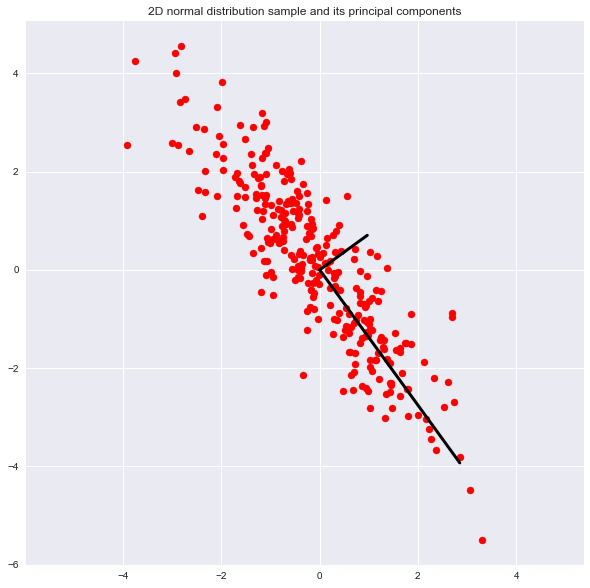

In [2]:
from sklearn.decomposition import PCA

np.random.seed(17)
mean = np.array([0.0, 0.0])
cov = np.array([[1, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

### Исходный датасет

In [3]:
iris_dataset = load_iris()
data = iris_dataset.data
target = iris_dataset.target

iris_df = pd.DataFrame(data)
iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
iris_df["label"] = target

iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
source_cols = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

X = iris_df[source_cols]
y = iris_df.label

In [5]:
iris_df.label.unique()

array([0, 1, 2])

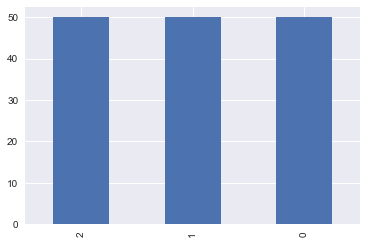

In [6]:
iris_df.label.value_counts().plot(kind="bar")

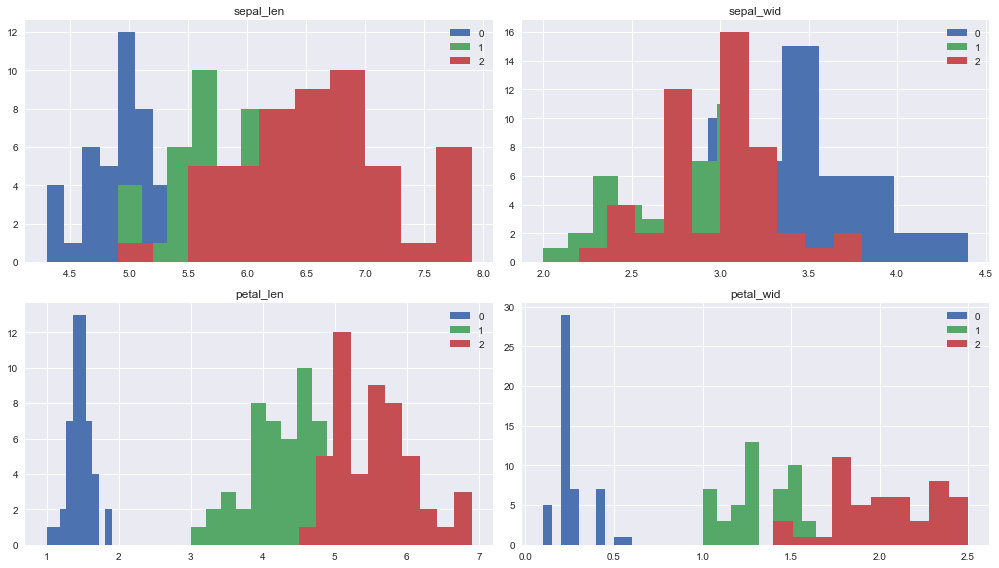

In [7]:
feature_cols = iris_df.drop("label", axis=1).columns.tolist()
labels = iris_df.label.unique()

plt.figure(figsize=(14,8))

for cnt, feature in enumerate(feature_cols):
    plt.subplot(2, 2, cnt + 1)
    for lab in labels:
        plt.title(feature)
        plt.hist(iris_df.loc[iris_df.label == lab][feature], label=str(lab))
        plt.legend()
        
plt.tight_layout()

### Стандартизация

In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_std = standard_scaler.fit_transform(X)

### Спектральное разложение

Собственные вектора и собственные значения ковариационной матрицы являются "ядром" метода главных компонент (PCA):

- Собственные вектора определяют направления осей координат в новом признаковом пространстве
- Собственные значения - их магнитуду

### Матрица ковариаций

Ковариация между двумя признаками:

$$\sigma_{jk} = \dfrac{1}{n - 1}\sum^n_{i=1}(x_{ij}-\overline{x_j})(x_{ik} - \overline{x_k})$$

В матричном виде:

$$\Sigma = \dfrac{1}{n - 1}(X - \overline{x})^T(X - \overline{x})$$

$$\overline{x} = \dfrac{1}{n}\sum^n_{i=1}x_i$$

In [9]:
x_mean = np.mean(X_std, axis=0)
x_mean

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [10]:
cov_mat = (X_std - x_mean).T.dot((X_std - x_mean)) / (X_std.shape[0] - 1)
print("Covariance matrix:")
cov_mat

Covariance matrix:


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
np.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### Разложение в базис из собственных векторов

In [12]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigenvalues:")
eig_vals

Eigenvalues:


array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [13]:
print("Eigenvectors:")
eig_vecs

Eigenvectors:


array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### Singular Value Decomposition (SVD)

В то время как поиск базиса из собственных векторов кажется наиболее интуитивным способом, в большинстве реализаций PCA так или иначе используется SVD

In [14]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

Основная цель PCA - уменьшение размерности исходного признакового пространства при помощи его проецирования на подпространство меньшего размера, в котором собственные векторы являются базисом. Однако, все собственные векторы имеют длину 1.

Для того чтобы определить то, какие векторы можно спокойно выбросить (их исключение приведет к наименьшей потери информации), необходимо исследовать собственные значения - вектора с наименьшими с.з. несут наименьшую информацию и поэтому могут быть убраны.

Поэтому отсортируем собственные значения по убыванию и выберем топ k.

In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9380850501999958
0.920164904162489
0.1477418210449481
0.020853862176462352


In [16]:
print("Eigenvectors:")
for i in eig_pairs:
    print(i[1])

Eigenvectors:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]
[-0.37741762 -0.92329566 -0.02449161 -0.06694199]
[-0.71956635  0.24438178  0.14212637  0.63427274]
[ 0.26128628 -0.12350962 -0.80144925  0.52359713]


### Explained Variance

In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

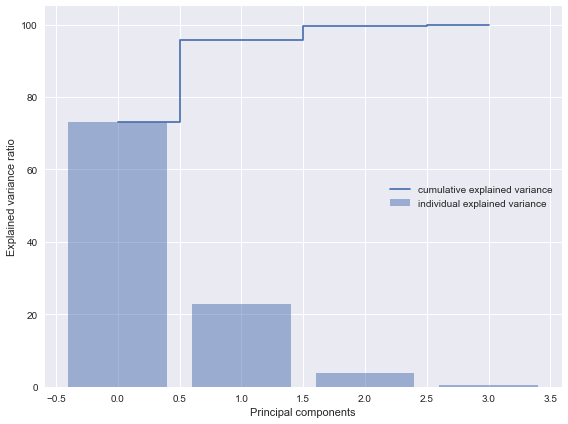

In [18]:
plt.figure(figsize=(8, 6))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [20]:
Y = X_std.dot(matrix_w)
Y[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

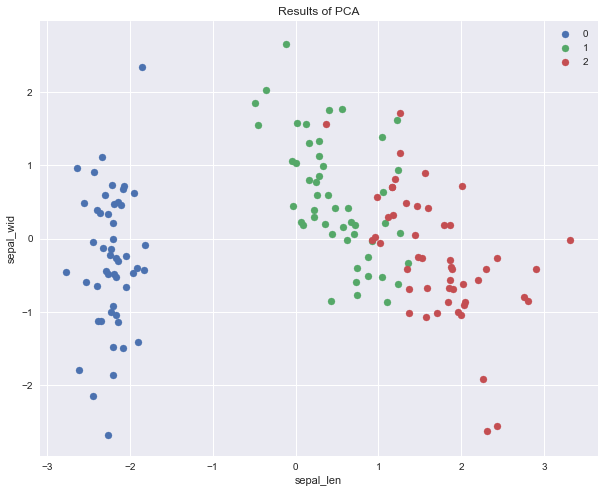

In [21]:
plt.figure(figsize=(10,8))
plt.title("Results of PCA")

for lab in labels:
    plt.scatter(Y[y == lab, 0], Y[y == lab, 1], label=lab)
    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.legend()

### Сжатие данных

(1797, 64)
(1797, 29)
Projecting 64-dimensional data to 2D


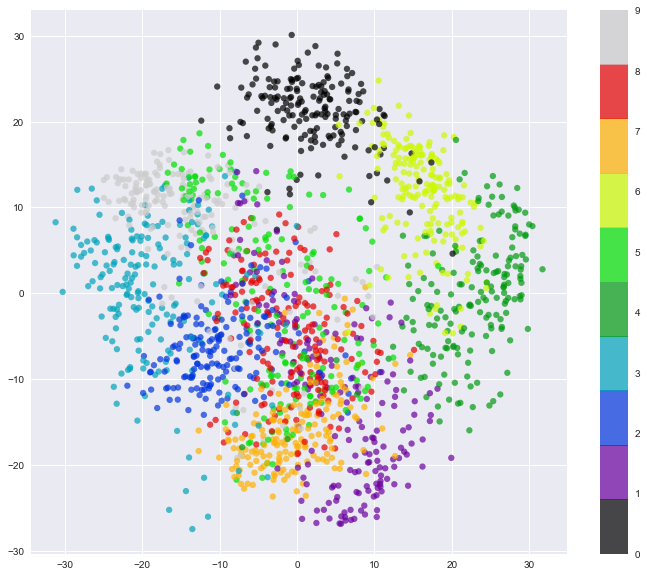

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)

pca = PCA(n_components=29)
X_reduced = pca.fit_transform(X)

print(X_reduced.shape)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

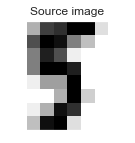

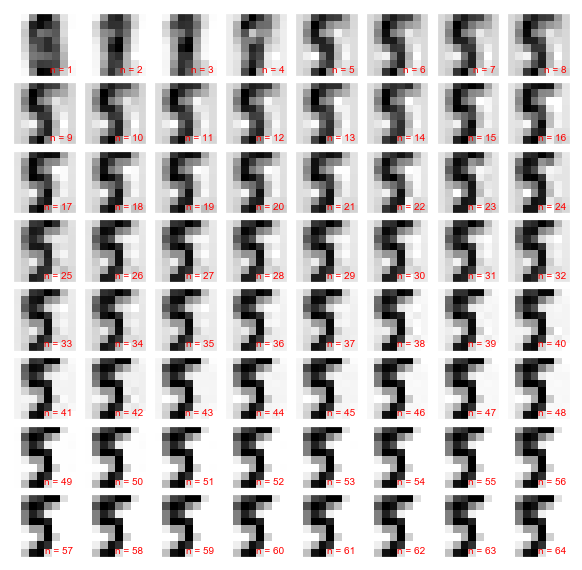

In [104]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

### K-means

Алгоритм К-means, наверное, самый популярный и простой алгоритм кластеризации и очень легко представляется в виде простого псевдокода:

- Выбрать количество кластеров $k$, которое нам кажется оптимальным для наших данных.
- Высыпать случайным образом в пространство наших данных $k$ точек (центроидов).
- Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
- Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
- Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

В случае обычной евклидовой метрики для точек лежащих на плоскости, этот алгоритм очень просто расписывается аналитически и рисуется. Давайте посмотрим соответствующий пример:

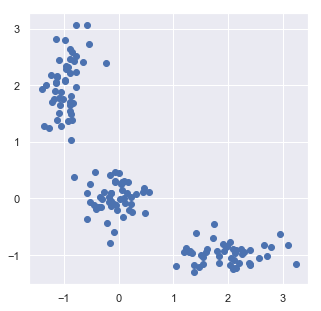

In [105]:
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [106]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)
    
    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

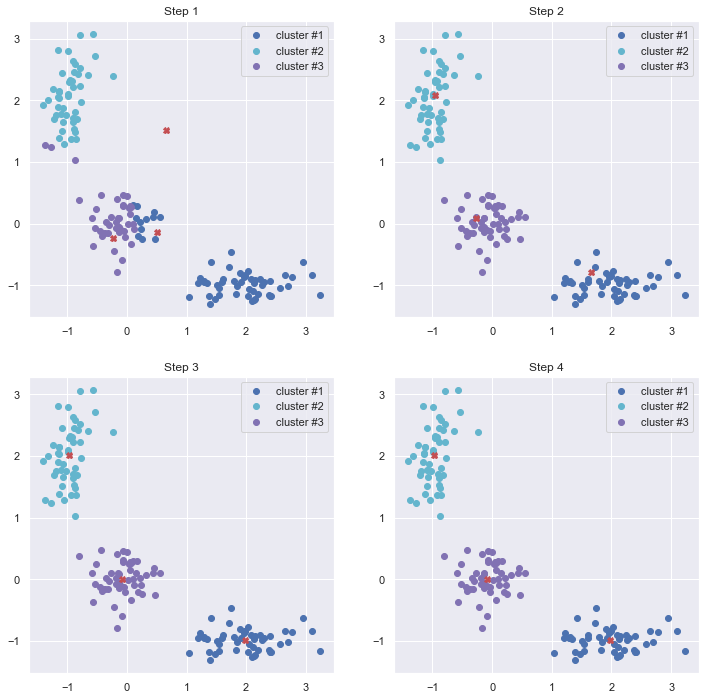

In [109]:
plt.figure(figsize=(12, 12))

for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Также стоит заметить, что хоть мы и рассматривали евклидово расстояние, алгоритм будет сходиться и в случае любой другой метрики, поэтому для различных задач кластеризации в зависимости от данных можно экспериментировать не только с количеством шагов или критерием сходимости, но и с метрикой, по которой мы считаем расстояния между точками и центроидами кластеров.

Другой особенностью этого алгоритма является то, что он чувствителен к исходному положению центроид кластеров в пространстве. В такой ситуации спасает несколько последовательных запусков алгоритма с последующим усреднением полученных кластеров.

### DBSCAN

Визуализация - https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [87]:
def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
            continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           # Get the next cluster label.
            C += 1
           
           # Assing the label to our seed point.
            labels[P] = C
           
           # Grow the cluster from the seed point.
            growCluster(D, labels, P, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # SearchQueue is a FIFO queue of points to evaluate. It will only ever 
    # contain points which belong to cluster C (and have already been labeled
    # as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):    
        
        # Get the next point from the queue.        
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue
        
        # Otherwise, we have the minimum number of neighbors, and this is a 
        # branch point.
            
        # For each of the neighbors...
        for Pn in NeighborPts:
           
            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough 
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
                labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.   
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C
                
                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)
            
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

### Преимущества

- Отлично отделяет кластеры с высокой плотностью
- Хорошо выделяет outliers в датасете
- Каждый объект в датасете будет посещен алгоритмом только 1 раз, что дает преимущество в производительности по сравнению с KMeans

### Недостатки

- Плохо отделяет кластеры с разной плотностью
- Плохо работает с большой размерностью данных

### Метрики качества кластеризации

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation